# Product Line Profitability & Margin Performance Analysis
### Nassau Candy Distributor

**Objective:**  
To analyze product-level and division-level profitability using gross profit and margin-based metrics, identify margin risks, and provide data-driven business recommendations.


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
#loading the data set 
df = pd.read_csv("Nassau Candy Distributor.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,1,US-2021-103800-CHO-MIL-31000,03-01-2024,30-06-2026,Standard Class,103800,United States,Houston,Texas,77095,Chocolate,Interior,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28
1,2,US-2021-112326-CHO-TRI-54000,04-01-2024,01-07-2026,Standard Class,112326,United States,Naperville,Illinois,60540,Chocolate,Interior,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
2,3,US-2021-112326-CHO-NUT-13000,04-01-2024,01-07-2026,Standard Class,112326,United States,Naperville,Illinois,60540,Chocolate,Interior,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,10.47,3,7.47,3.00
3,4,US-2021-112326-CHO-SCR-58000,04-01-2024,01-07-2026,Standard Class,112326,United States,Naperville,Illinois,60540,Chocolate,Interior,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,10.80,3,7.50,3.30
4,5,US-2021-141817-CHO-TRI-54000,05-01-2024,05-07-2026,Standard Class,141817,United States,Philadelphia,Pennsylvania,19143,Chocolate,Atlantic,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,11.25,3,7.35,3.90


## Data Understanding

The dataset contains transactional sales data for Nassau Candy Distributor, including:
- Order and shipping information
- Product and division details
- Sales, cost, units, and gross profit metrics

Each row represents a single order line item.


In [3]:
df.shape
df.info

<bound method DataFrame.info of        Row ID                      Order ID  Order Date   Ship Date  \
0           1  US-2021-103800-CHO-MIL-31000  03-01-2024  30-06-2026   
1           2  US-2021-112326-CHO-TRI-54000  04-01-2024  01-07-2026   
2           3  US-2021-112326-CHO-NUT-13000  04-01-2024  01-07-2026   
3           4  US-2021-112326-CHO-SCR-58000  04-01-2024  01-07-2026   
4           5  US-2021-141817-CHO-TRI-54000  05-01-2024  05-07-2026   
...       ...                           ...         ...         ...   
10189   10190  US-2024-143259-CHO-MIL-31000  30-12-2025  26-06-2030   
10190   10191  US-2024-115427-CHO-NUT-13000  30-12-2025  26-06-2030   
10191   10192  US-2024-156720-CHO-SCR-58000  30-12-2025  26-06-2030   
10192   10193  US-2024-143259-CHO-TRI-54000  30-12-2025  26-06-2030   
10193   10194  CA-2024-143500-CHO-SCR-58000  30-12-2025  26-06-2030   

            Ship Mode  Customer ID Country/Region           City  \
0      Standard Class       103800  United Stat

In [4]:
#date parsing
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


C:\Users\thesh\AppData\Local\Temp\ipykernel_9724\614161291.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [5]:
df[['Order Date', 'Ship Date']].isna().sum()


Order Date    0
Ship Date     0
dtype: int64

In [6]:
#validating financial data
df[['Sales', 'Cost', 'Gross Profit', 'Units']].describe()


,Sales,Cost,Gross Profit,Units
count,10194.000000,10194.000000,10194.000000,10194.000000
mean,13.908537,4.742087,9.166451,3.791838
std,11.341020,5.061647,6.643740,2.228317
min,1.250000,0.600000,0.250000,1.000000
25%,7.200000,2.400000,4.900000,2.000000
50%,10.800000,3.600000,7.470000,3.000000
75%,18.000000,5.700000,12.250000,5.000000
max,260.000000,130.000000,130.000000,14.000000


In [7]:
(df[['Sales', 'Cost', 'Gross Profit', 'Units']] <= 0).sum()

Sales           0
Cost            0
Gross Profit    0
Units           0
dtype: int64

## Key Profitability Metrics

To evaluate true business performance, the following KPIs were calculated:
- Gross Margin (%)
- Profit per Unit


In [8]:
df['Gross Margin %'] = df['Gross Profit'] / df['Sales']
df['Profit per Unit'] = df['Gross Profit'] / df['Units']


In [9]:
df[['Gross Margin %', 'Profit per Unit']].describe()

,Gross Margin %,Profit per Unit
count,10194.000000,10194.000000
mean,0.665140,2.412539
std,0.067210,0.806007
min,0.076923,0.250000
25%,0.653333,2.400000
50%,0.666667,2.450000
75%,0.694444,2.490000
max,0.800000,10.000000


In [10]:
group_by_product_name = df.groupby(["Product Name"],as_index=False)
total_profit_contribution = group_by_product_name["Gross Profit"].sum()
total_profit_contribution.sort_values(by=["Gross Profit"],ascending=False)

,Product Name,Gross Profit
13,Wonka Bar -Scrumdiddlyumptious,19357.50
12,Wonka Bar - Triple Dazzle Caramel,18610.20
10,Wonka Bar - Milk Chocolate,17443.37
11,Wonka Bar - Nutty Crunch Surprise,16819.95
9,Wonka Bar - Fudge Mallows,16593.60
6,Lickable Wallpaper,3930.00
14,Wonka Gum,310.70
0,Everlasting Gobstopper,104.00
4,Kazookles,92.75
3,Hair Toffee,59.50


# PRODUCT-LEVEL PROFITABILITY ANALYSIS

This section evaluates product performance based on profitability metrics rather than sales volume, in order to identify high-performing products and margin-risk products.


In [11]:
product_summary = (
    df
    .groupby(['Product ID', 'Product Name'], as_index=False)
    .agg({
        'Sales': 'sum',
        'Gross Profit': 'sum',
        'Units': 'sum'
    })
)

product_summary['Gross Margin %'] = product_summary['Gross Profit'] / product_summary['Sales']
product_summary['Profit per Unit'] = product_summary['Gross Profit'] / product_summary['Units']

product_summary.head()

,Product ID,Product Name,Sales,Gross Profit,Units,Gross Margin %,Profit per Unit
0,CHO-FUD-51000,Wonka Bar - Fudge Mallows,24890.40,16593.60,6914,0.666667,2.40
1,CHO-MIL-31000,Wonka Bar - Milk Chocolate,26867.75,17443.37,8267,0.649231,2.11
2,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,23574.95,16819.95,6755,0.713467,2.49
3,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,27874.80,19357.50,7743,0.694444,2.50
4,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,28485.00,18610.20,7596,0.653333,2.45


##### Ranking Products by Profit (NOT Sales). Top Products by Gross Profit


In [12]:
top_profit_products = product_summary.sort_values('Gross Profit', ascending=False)

top_profit_products[["Product Name","Gross Profit"]].head(10)


top_gross_margin = product_summary.sort_values("Gross Margin %", ascending = False)

top_gross_margin[["Product Name","Gross Margin %"]].head(10)


,Product Name,Gross Margin %
9,Everlasting Gobstopper,0.800000
11,Hair Toffee,0.777778
2,Wonka Bar - Nutty Crunch Surprise,0.713467
3,Wonka Bar -Scrumdiddlyumptious,0.694444
0,Wonka Bar - Fudge Mallows,0.666667
4,Wonka Bar - Triple Dazzle Caramel,0.653333
1,Wonka Bar - Milk Chocolate,0.649231
12,Laffy Taffy,0.623116
5,Fizzy Lifting Drinks,0.600000
6,Wonka Gum,0.520000


In [13]:
top_profit_products['Rank'] = top_profit_products['Gross Profit'].rank(ascending=False)

top_profit_products = top_profit_products.sort_values('Rank')
top_profit_products[["Product Name", 'Gross Profit','Rank']]

,Product Name,Gross Profit,Rank
3,Wonka Bar -Scrumdiddlyumptious,19357.50,1.0
4,Wonka Bar - Triple Dazzle Caramel,18610.20,2.0
1,Wonka Bar - Milk Chocolate,17443.37,3.0
2,Wonka Bar - Nutty Crunch Surprise,16819.95,4.0
0,Wonka Bar - Fudge Mallows,16593.60,5.0
8,Lickable Wallpaper,3930.00,6.0
6,Wonka Gum,310.70,7.0
9,Everlasting Gobstopper,104.00,8.0
7,Kazookles,92.75,9.0
11,Hair Toffee,59.50,10.0


##### Ranking Products by Margin (NOT Sales). Top Products by Gross Margin


In [14]:
top_gross_margin["Rank"] = top_profit_products["Gross Margin %"].rank(ascending = False)
top_gross_margin = top_gross_margin.sort_values(by = 'Rank')
top_gross_margin[["Product Name","Gross Margin %","Rank"]]

,Product Name,Gross Margin %,Rank
9,Everlasting Gobstopper,0.800000,1.0
11,Hair Toffee,0.777778,2.0
2,Wonka Bar - Nutty Crunch Surprise,0.713467,3.0
3,Wonka Bar -Scrumdiddlyumptious,0.694444,4.0
0,Wonka Bar - Fudge Mallows,0.666667,5.0
4,Wonka Bar - Triple Dazzle Caramel,0.653333,6.0
1,Wonka Bar - Milk Chocolate,0.649231,7.0
12,Laffy Taffy,0.623116,8.0
5,Fizzy Lifting Drinks,0.600000,9.0
6,Wonka Gum,0.520000,10.0


#### Identifying “Margin Traps”

In [15]:
sales_threshold = product_summary['Sales'].quantile(0.75)
margin_threshold = product_summary['Gross Margin %'].quantile(0.25)
print(sales_threshold)
print(margin_threshold)

24232.675000000003
0.48333333333333334


In [16]:
margin_traps = product_summary[
    (product_summary['Sales'] >= sales_threshold) &
    (product_summary['Gross Margin %'] <= margin_threshold)
]

margin_traps

,Product ID,Product Name,Sales,Gross Profit,Units,Gross Margin %,Profit per Unit


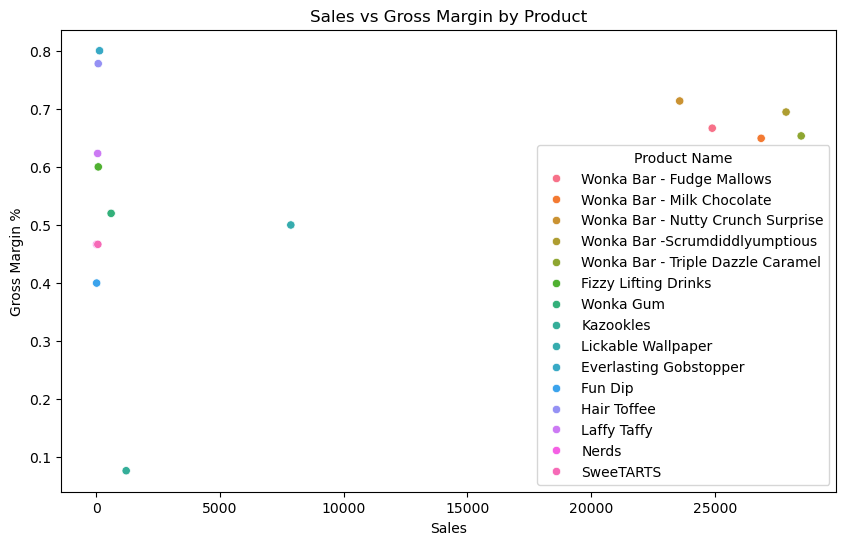

In [17]:
# Visual: Sales vs Margin
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=product_summary,
    x='Sales',
    y='Gross Margin %',
    hue='Product Name'
)
plt.title('Sales vs Gross Margin by Product')
plt.show()


# DIVISION-LEVEL PERFORMANCE ANALYSIS

In [18]:
## Division-Level Performance Analysis

# This section evaluates profitability across business divisions to identify structural strengths and margin risks.


In [19]:
division_summary = (
    df
    .groupby('Division', as_index=False)
    .agg({
        'Sales': 'sum',
        'Gross Profit': 'sum',
        'Units': 'sum'
    })
)

division_summary['Gross Margin %'] = division_summary['Gross Profit'] / division_summary['Sales']
division_summary['Profit per Unit'] = division_summary['Gross Profit'] / division_summary['Units']

division_summary


,Division,Sales,Gross Profit,Units,Gross Margin %,Profit per Unit
0,Chocolate,131692.90,88824.62,37275,0.674483,2.382954
1,Other,9663.25,4333.45,1242,0.448446,3.489090
2,Sugar,427.48,284.73,137,0.666066,2.078321


### Revenue vs Profit by Division


In [20]:
division_summary.sort_values('Sales', ascending=False)
division_summary.sort_values('Gross Profit', ascending=False)


,Division,Sales,Gross Profit,Units,Gross Margin %,Profit per Unit
0,Chocolate,131692.90,88824.62,37275,0.674483,2.382954
1,Other,9663.25,4333.45,1242,0.448446,3.489090
2,Sugar,427.48,284.73,137,0.666066,2.078321


Sales vs Gross Profit

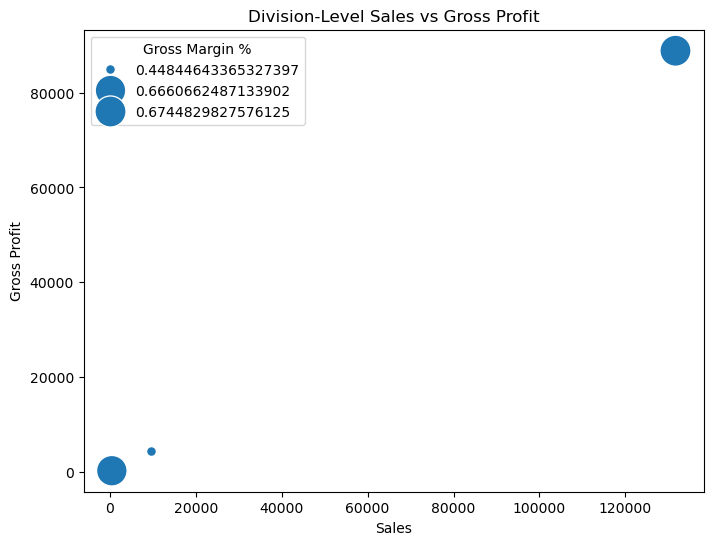

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=division_summary,
    x='Sales',
    y='Gross Profit',
    size='Gross Margin %',
    sizes=(50, 500),
    legend=True
)
plt.title('Division-Level Sales vs Gross Profit')
plt.show()

### Gross Margin Distribution by Division


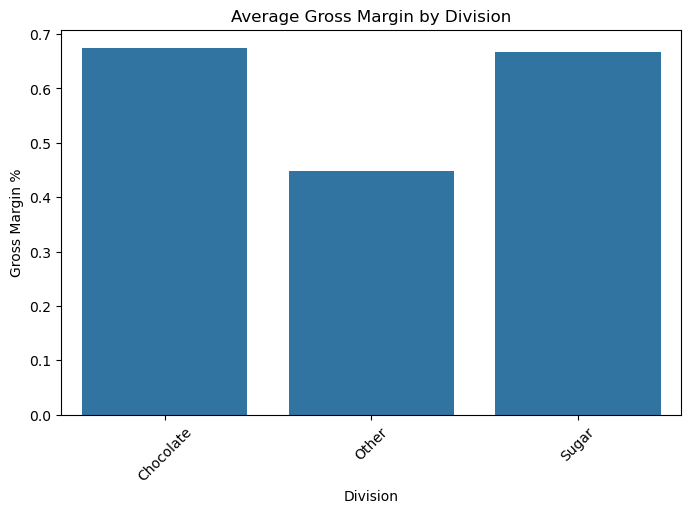

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=division_summary,
    x='Division',
    y='Gross Margin %'
)
plt.xticks(rotation=45)
plt.title('Average Gross Margin by Division')
plt.show()


### Division Classification

In [23]:
high_margin_threshold = division_summary['Gross Margin %'].quantile(0.75)

division_summary['Division Category'] = np.where(
    division_summary['Gross Margin %'] >= high_margin_threshold,
    'High Margin Division',
    'Margin Improvement Needed'
)

division_summary[['Division', 'Division Category']]


,Division,Division Category
0,Chocolate,High Margin Division
1,Other,Margin Improvement Needed
2,Sugar,Margin Improvement Needed


# Profit Concentration (Pareto) Analysis

In [24]:
## Profit Concentration Analysis (Pareto Principle)

#### This section applies the Pareto principle to determine whether a small percentage of products contribute disproportionately to overall profitability.


In [25]:
# Preparing Pareto Dataset (Product-Level)
pareto_df = product_summary.sort_values('Gross Profit', ascending=False).copy()

pareto_df['Cumulative Profit'] = pareto_df['Gross Profit'].cumsum()
pareto_df['Cumulative Profit %'] = pareto_df['Cumulative Profit'] / pareto_df['Gross Profit'].sum()

pareto_df.head()


,Product ID,Product Name,Sales,Gross Profit,Units,Gross Margin %,Profit per Unit,Cumulative Profit,Cumulative Profit %
3,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,27874.80,19357.50,7743,0.694444,2.50,19357.50,0.207159
4,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,28485.00,18610.20,7596,0.653333,2.45,37967.70,0.406320
1,CHO-MIL-31000,Wonka Bar - Milk Chocolate,26867.75,17443.37,8267,0.649231,2.11,55411.07,0.592995
2,CHO-NUT-13000,Wonka Bar - Nutty Crunch Surprise,23574.95,16819.95,6755,0.713467,2.49,72231.02,0.772997
0,CHO-FUD-51000,Wonka Bar - Fudge Mallows,24890.40,16593.60,6914,0.666667,2.40,88824.62,0.950577


In [26]:
# Identify 80% Profit Contributors
pareto_80 = pareto_df[pareto_df['Cumulative Profit %'] <= 0.8]

len(pareto_80), len(pareto_df)


(4, 15)

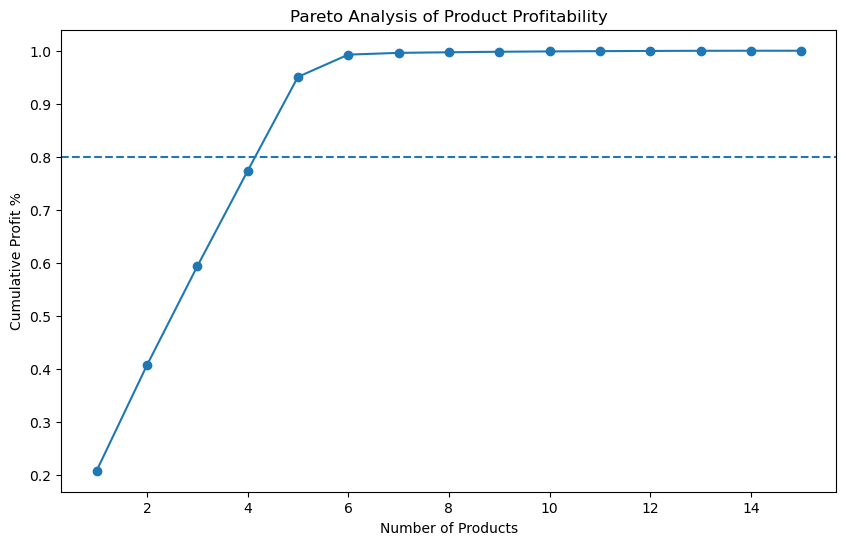

In [27]:
# Pareto curve visualisation

plt.figure(figsize=(10,6))
plt.plot(
    range(1, len(pareto_df) + 1),
    pareto_df['Cumulative Profit %'],
    marker='o'
)
plt.axhline(0.8, linestyle='--')
plt.xlabel('Number of Products')
plt.ylabel('Cumulative Profit %')
plt.title('Pareto Analysis of Product Profitability')
plt.show()


# COST STRUCTURE, CONTRIBUTION & MARGIN RISK ANALYSIS

#### Revenue and Profit Contribution Analysis

##### This section evaluates each product’s contribution to total revenue and total profit in order to identify portfolio dependency and strategic importance.


In [30]:
total_sales = product_summary['Sales'].sum()
total_profit = product_summary['Gross Profit'].sum()

product_summary['Revenue Contribution %'] = product_summary['Sales'] / total_sales
product_summary['Profit Contribution %'] = product_summary['Gross Profit'] / total_profit

product_summary[['Product Name', 'Revenue Contribution %', 'Profit Contribution %']].head()


,Product Name,Revenue Contribution %,Profit Contribution %
0,Wonka Bar - Fudge Mallows,0.175552,0.177580
1,Wonka Bar - Milk Chocolate,0.189498,0.186674
2,Wonka Bar - Nutty Crunch Surprise,0.166274,0.180003
3,Wonka Bar -Scrumdiddlyumptious,0.196601,0.207159
4,Wonka Bar - Triple Dazzle Caramel,0.200905,0.199161


### Revenue Pareto (80% Revenue Contributors)

In [32]:
## Revenue Concentration Analysis (Pareto)


revenue_pareto = product_summary.sort_values('Sales', ascending=False).copy()

revenue_pareto['Cumulative Revenue'] = revenue_pareto['Sales'].cumsum()
revenue_pareto['Cumulative Revenue %'] = revenue_pareto['Cumulative Revenue'] / total_sales

revenue_80 = revenue_pareto[revenue_pareto['Cumulative Revenue %'] <= 0.8]

len(revenue_80), len(revenue_pareto)


(4, 15)

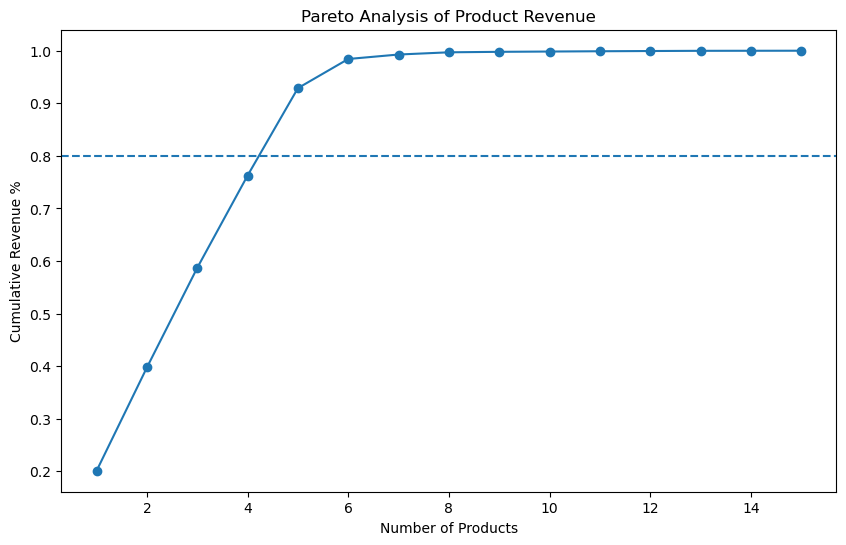

In [33]:
# Revenue Pareto Visualization

plt.figure(figsize=(10,6))
plt.plot(
    range(1, len(revenue_pareto) + 1),
    revenue_pareto['Cumulative Revenue %'],
    marker='o'
)
plt.axhline(0.8, linestyle='--')
plt.xlabel('Number of Products')
plt.ylabel('Cumulative Revenue %')
plt.title('Pareto Analysis of Product Revenue')
plt.show()


### Cost Structure Diagnostics

#### This section analyzes the relationship between product cost and sales to identify pricing inefficiencies and margin risk.


In [34]:
product_cost_summary = (
    df
    .groupby(['Product ID', 'Product Name'], as_index=False)
    .agg({
        'Sales': 'sum',
        'Cost': 'sum',
        'Gross Profit': 'sum',
        'Units': 'sum'
    })
)

product_cost_summary['Gross Margin %'] = product_cost_summary['Gross Profit'] / product_cost_summary['Sales']


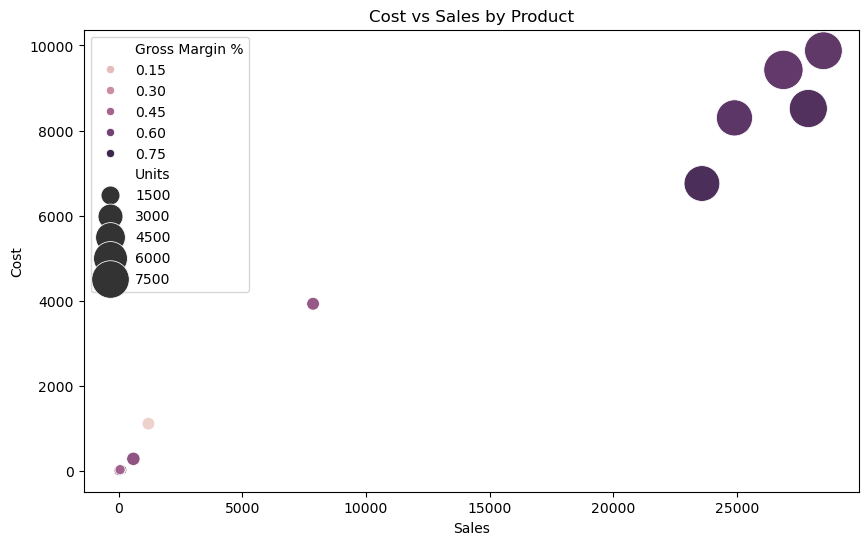

In [35]:
# Cost vs Sales Scatter

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=product_cost_summary,
    x='Sales',
    y='Cost',
    hue='Gross Margin %',
    size='Units',
    sizes=(50, 800)
)
plt.title('Cost vs Sales by Product')
plt.show()


### Margin Risk Identification and Action Flags


In [36]:
margin_low = product_cost_summary['Gross Margin %'].quantile(0.25)
sales_high = product_cost_summary['Sales'].quantile(0.75)
profit_low = product_cost_summary['Gross Profit'].quantile(0.25)

def risk_flag(row):
    if row['Sales'] >= sales_high and row['Gross Margin %'] <= margin_low:
        return 'Repricing Required'
    elif row['Gross Profit'] <= profit_low:
        return 'Discontinue / Review'
    else:
        return 'Healthy / Monitor'

product_cost_summary['Action Flag'] = product_cost_summary.apply(risk_flag, axis=1)

product_cost_summary['Action Flag'].value_counts()


Action Flag
Healthy / Monitor       11
Discontinue / Review     4
Name: count, dtype: int64

#### Margin Volatility Analysis

#### Margin volatility measures the stability of profitability over time.


In [37]:
df['Order Month'] = df['Order Date'].dt.to_period('M')

monthly_margin = (
    df
    .groupby(['Product Name', 'Order Month'], as_index=False)
    .agg({
        'Sales': 'sum',
        'Gross Profit': 'sum'
    })
)

monthly_margin['Gross Margin %'] = monthly_margin['Gross Profit'] / monthly_margin['Sales']

margin_volatility = (
    monthly_margin
    .groupby('Product Name')['Gross Margin %']
    .std()
    .reset_index(name='Margin Volatility')
)

margin_volatility.sort_values('Margin Volatility', ascending=False).head()


,Product Name,Margin Volatility
9,Wonka Bar - Fudge Mallows,9.544887e-17
10,Wonka Bar - Milk Chocolate,7.677904e-17
11,Wonka Bar - Nutty Crunch Surprise,6.124848e-17
13,Wonka Bar -Scrumdiddlyumptious,5.670508e-17
8,SweeTARTS,3.634058e-17
